In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import scipy as sp
import os, sys,glob, copy
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('default')
%matplotlib inline

sys.path.append("/Users/xiaoxuanj/work/work_allen/Ephys/code_library/ephys_code")

import data_loader as dl

import matrix_utils as mu

import functional_clustering as fc

import get_layer_dict as gd


In [2]:
def merge_small_cluster(labels, min_size=10):
# group small clusters to neighboring large one
    new_labels=np.zeros(len(labels))
    l_tmp=0
    for i, l in enumerate(np.unique(labels)):
        idx = np.where(labels==l)[0] 
        if i==0:
            new_labels[idx]=l_tmp
        else:
            if len(idx)<min_size:
                new_labels[idx]=l_tmp
            else:
                l_tmp+=1
                new_labels[idx]=l_tmp
    return new_labels


# load data

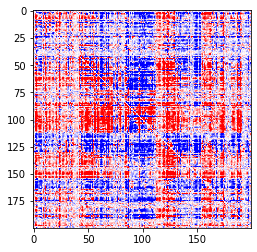

In [4]:
mouse_IDs = ['306046','388523', '389262',  '408153','410344', '415149', '412809', '412804',
            '416357', '416856', '419114', '419115', '419117', '419118', '419119', '424445'] 

mouse_ID = mouse_IDs[5]

X = np.load('/Users/xiaoxuanj/work/work_allen/Ephys/processed_data/adjacency_matrix/RF_onscreen/mouse'+mouse_ID+'_adjacency_matrix_RF.npy')

df = pd.read_csv('/Users/xiaoxuanj/work/work_allen/Ephys/processed_data/meta_cluster_RF/mouse'+mouse_ID+'_meta_cluster_RF.csv')
plt.imshow(X, cmap='bwr', vmax=0.000002, vmin=-0.000002)


# biclustering (cluster rows and column in the same time)

In [5]:
from sklearn.cluster import SpectralCoclustering
from sklearn.metrics import consensus_score
model = SpectralCoclustering(n_clusters=3, random_state=3).fit(X)

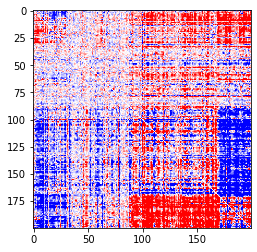

In [6]:
fit_data = X[np.argsort(model.row_labels_),:][:, np.argsort(model.row_labels_)]

plt.figure()
plt.imshow(fit_data, cmap='bwr', vmax=0.000002, vmin=-0.000002)


# spectral clustering (cluster rows and column in the same time)

In [7]:
from sklearn.cluster import SpectralClustering
clustering = SpectralClustering(n_clusters=3,
        assign_labels="discretize",
        random_state=0).fit(X)

clustering.labels_


array([0, 0, 2, 2, 0, 2, 1, 1, 0, 2, 0, 2, 2, 0, 0, 2, 0, 1, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 2, 0, 2, 2, 1, 2, 2, 1, 2, 2, 0, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2,
       0, 1, 2, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 2, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       2, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 1, 0, 2, 0, 1, 2, 0, 0, 2, 1, 2, 1,
       0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 2, 1, 1, 2, 2, 0, 0, 0, 0, 2, 1,
       0, 0])

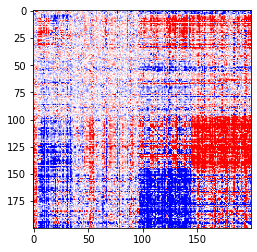

In [8]:
fit_data = X[np.argsort(clustering.labels_),:][:, np.argsort(clustering.labels_)]

plt.figure()
plt.imshow(fit_data, cmap='bwr', vmax=0.000002, vmin=-0.000002)


# functional clustering on X

In [ ]:
import functional_clustering as fc

FCo = fc.functional_clustering(np.nan_to_num(X))

# normalization is important to avoid negative matrix definate
FCo.normalize()
# probiliaty matrix from kmeans
matrix = FCo.probability_matrix(3, data=FCo.X_n)

# hierarchical clustering
FCo.linkage()

# plot hierarchical clustering matrix
FCo.plot_matrix()

# save output cluster ids
FCo.predict_cluster(k=3)


# functional clustering on PCA (cluster based on the patterns in columns)

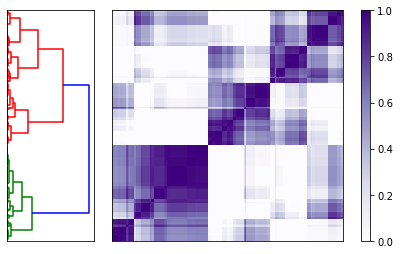

In [12]:
import functional_clustering as fc

FC = fc.functional_clustering(X)

# normalize and PCA
FC.normalize()
FC.pca()
# plotted cov of connectivity matrix

# probiliaty matrix from kmeans
matrix = FC.probability_matrix(3, data=FC.Z.T)

# hierarchical clustering
FC.linkage()

# plot hierarchical clustering matrix
FC.plot_matrix()

# save output cluster ids
FC.predict_cluster(k=3)
labels= FC.clusters

#f = '/Users/xiaoxuanj/work/work_allen/Ephys/mouse'+mouse_ID+'/'+condi+'_cluster_labels.npy'
#np.save(f, labels)
#plt.savefig('/Users/xiaoxuanj/work/work_allen/Ephys/figures/response_properties/connectivity_matrix/mouse'+mouse_ID+'_clusters_'+condi+'.pdf')

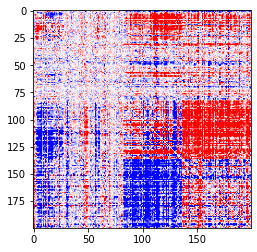

In [13]:
fit_data = X[np.argsort(FC.clusters),:][:, np.argsort(FC.clusters)]

plt.figure()
plt.imshow(fit_data, cmap='bwr', vmax=0.000002, vmin=-0.000002)


# visualize the overlapping degree of different clustering results

## 1. plot the clustered connectivity matrix

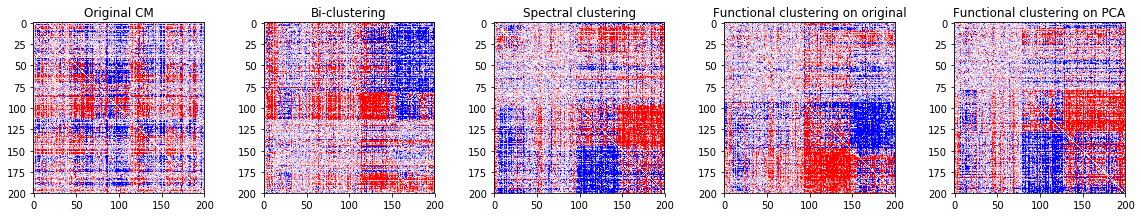

In [31]:
plt.figure(figsize=(16, 3))
plt.subplot(151)
plt.imshow(X, cmap='bwr', vmax=0.000002, vmin=-0.000002)
plt.title('Original CM')

plt.subplot(152)
fit_data = X[np.argsort(model.row_labels_),:][:, np.argsort(model.column_labels_)]
plt.imshow(fit_data, cmap='bwr', vmax=0.000002, vmin=-0.000002)
plt.title('Bi-clustering')

plt.subplot(153)
fit_data = X[np.argsort(clustering.labels_),:][:, np.argsort(clustering.labels_)]
plt.imshow(fit_data, cmap='bwr', vmax=0.000002, vmin=-0.000002)
plt.title('Spectral clustering')

plt.subplot(154)
fit_data = X[np.argsort(FCo.clusters),:][:, np.argsort(FCo.clusters)]
plt.imshow(fit_data, cmap='bwr', vmax=0.000002, vmin=-0.000002)
plt.title('Functional clustering on original')

plt.subplot(155)
fit_data = X[np.argsort(FC.clusters),:][:, np.argsort(FC.clusters)]
plt.imshow(fit_data, cmap='bwr', vmax=0.000002, vmin=-0.000002)
plt.title('Functional clustering on PCA')
plt.tight_layout()
plt.savefig('/Users/xiaoxuanj/Documents/Paper_functional_connectivity/materials/supp_fig2_cluster_methods.pdf')


## 2. compare cluster results with venn

In [3]:
def reassign_labels(X, labels):
    """
    reassgin labels based on total connectivity strength in each cluster
    1: in-significant pairs
    2: positive connections
    3: negative connections
    """
    total=[]
    ul=np.unique(labels)
    for u in ul:
        tmp = X[np.where(labels==u)[0],:]
        #idx_sort = np.argsort(abs(X[np.where(labels==u)[0],:].flatten()))
        # max50-min50
        total.append(tmp.flatten().mean())

    new_labels = np.ones(len(labels))
    if min(ul)==0:
        new_labels[np.where(labels==np.where(total==max(total))[0][0])]=2
        new_labels[np.where(labels==np.where(total==min(total))[0][0])]=3
    elif min(ul)==1:
        new_labels[np.where(labels==np.where(total==max(total))[0][0]+1)]=2
        new_labels[np.where(labels==np.where(total==min(total))[0][0]+1)]=3
        
    return new_labels

def test_reassign_labels(X, new_labels):
    plt.figure(figsize=(10,3))
    for i in np.unique(new_labels):
        tmp = X[np.where(new_labels==i)[0],:]
        plt.subplot(1,3,i)
        plt.imshow(tmp, cmap='bwr', vmax=0.000002, vmin=-0.000002)
        plt.title('cluster '+str(i))
        #print(np.mean(tmp.flatten()))

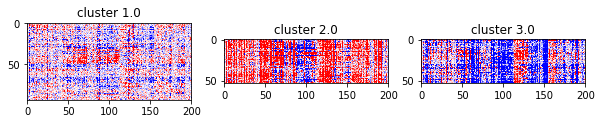

In [32]:
labels = FCo.clusters
new_labels = reassign_labels(X, labels)
test_reassign_labels(X, new_labels)

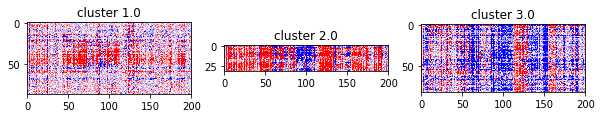

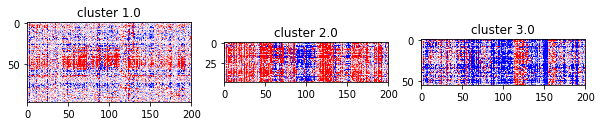

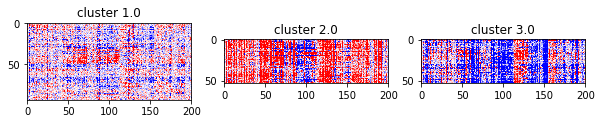

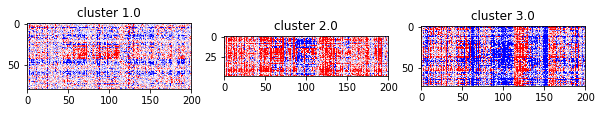

In [35]:
lb_bc=reassign_labels(X, model.row_labels_)
test_reassign_labels(X, lb_bc)
plt.savefig('/Users/xiaoxuanj/Documents/Paper_functional_connectivity/materials/supp_fig2_cluster_method_bc.pdf')

lb_sc=reassign_labels(X, clustering.labels_)
test_reassign_labels(X, lb_sc)
plt.savefig('/Users/xiaoxuanj/Documents/Paper_functional_connectivity/materials/supp_fig2_cluster_method_sc.pdf')

lb_fco=reassign_labels(X, FCo.clusters)
test_reassign_labels(X, lb_fco)
plt.savefig('/Users/xiaoxuanj/Documents/Paper_functional_connectivity/materials/supp_fig2_cluster_method_fco.pdf')

lb_fc=reassign_labels(X, FC.clusters)
test_reassign_labels(X, lb_fc)
plt.savefig('/Users/xiaoxuanj/Documents/Paper_functional_connectivity/materials/supp_fig2_cluster_method_fc.pdf')


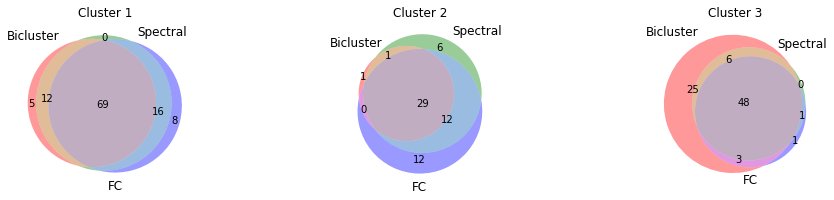

In [38]:
from matplotlib_venn import venn3, venn3_circles, venn2
plt.figure(figsize=(16,3))
for c in [1,2,3]:
    plt.subplot(1,3,c)
    venn3([set(np.where(lb_bc==c)[0]), set(np.where(lb_sc==c)[0]), set(np.where(lb_fco==c)[0])], ('Bicluster', 'Spectral', 'FC'))
    plt.title('Cluster '+str(c))
plt.savefig('/Users/xiaoxuanj/Documents/Paper_functional_connectivity/materials/supp_fig2_cluster_methods_venn.pdf')


In [ ]:
# Present with intersection plot